<a href="https://colab.research.google.com/github/DevHyunseo/PoscoAcademy_Bigdata/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B52(%ED%9B%84%ED%8C%90%EA%B3%B5%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
sns.set_palette('Pastel1')
matplotlib.rc("axes",unicode_minus = False)
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# !pip install graphviz
# !pip install xgboost

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [ ]:
from matplotlib import rc
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = r'C:\Users\USER\Downloads\nanum-all\나눔 글꼴\나눔고딕\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [ ]:
df = pd.read_csv(r"C:\Users\USER\Desktop\SCALE불량.csv", encoding = 'euc-kr')

#df = pd.read_csv("/home/piai/다운로드/01 실습파일/2. Big Data 분석/SCALE불량.csv", encoding = 'euc-kr')

df

# df = pd.read_csv("/home/piai/바탕화면/01 실습파일/2. Big Data 분석/SCALE불량.CSV", encoding = 'euc-kr')

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [ ]:
# 나머지 경로
#df = pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding = 'euc-kr')
#df = df.drop(index=860)
#df = df.drop(index=859)
#df.reset_index(drop=True, inplace=True)
df

## 변수 확인

- plate_no : 팔레트 번호
- rolling_date : 열연작업시각
- scale : Scale 불량
- spec_long : 제품 규격
- spec_country : 제픔 규격 기준국
- steel_kind : 강종
- pt_thick : 후판 지시뚜께 mm
- pt_width : 후판 지시폭 mm
- pt_length : 후판 지시길이 mm
- hsb : HSB(Hot Scale Braker)적용여부
- fur_no : 가열로 호기
- fur_input_row : 가열로 장입열
- fur_heat_temp : 가열로 가열대 소재온도('C)
- fur_heat_time : 가열로 가열대 재로시간(분)
- fur_soak_temp : 가열로 균열대 소재온도('C)
- fur_soak_time : 가열로 균열대 재로시간(분)
- fur_total_time : 가열로 총 재로시간(분)
- fur_ex_temp : 가열로 추출온도 (('C , 계산치))
- rolling_method : 압연방법
- rolling_temp : 압연온도('C)
- descaling_count : 압연 Descaling 횟수
- work_group : 작업조

In [ ]:
# Data 구조 확인
print("Data 구조:", df.shape)
print()
print("변수 : ", df.columns)

In [ ]:
df.columns # 컬럼명 확인

In [ ]:
df.info();df.shape   # 연속형 10개 / 그 외 11개 범주형

In [ ]:
df.isnull().sum() # 결측치가 없다

In [ ]:
df.describe() # 연속형 변수들의 기술 통계량

In [ ]:
df["plate_no"].value_counts() # (plate 번호) 숫자가 1개씩 있는거라 제거해도될듯

In [ ]:
df["rolling_date"].value_counts() #  (열연작업시각) 모두 다름 (일 월 년 시간순)

In [ ]:
df["scale"].value_counts() #  Scale(산화철) 불량 목표변수 정상 690개 불량 310개

In [ ]:
df["spec_long"].value_counts() #제품 규격  제 각각 개판임

In [ ]:
df["spec_country"].value_counts() #제품 규격 기준국

In [ ]:
df["steel_kind"].value_counts() # 강종 c와 t두개 뿐

In [ ]:
df["hsb"].value_counts() #  HSB(Hot Scale Braker)적용여부 이진형

In [ ]:
df["fur_no"].value_counts() #  가열로 호기 3개 단위제거후 연속형

In [ ]:
df["fur_input_row"].value_counts() #  가열로 장입열 2개  #단위제거 후 이산형으로

In [ ]:
df["rolling_method"].value_counts() # 압연 방법2개법

In [ ]:
df["work_group"].value_counts() # 압연 방법2개법 단위제거후 이산형??

In [ ]:
# 단위 work_group (조) fur_no(호기) fur_input_row(열)

### 결측치 제거

In [ ]:
df[df["rolling_temp"]== 0.0] # 0 값 확인

In [ ]:
df = df.drop(index=53)
df = df.drop(index=221)
df = df.drop(index=222)
df = df.drop(index=598)
df = df.drop(index=599)
df = df.drop(index=600)

In [ ]:
df.info()

In [ ]:
df.isnull().sum() # 결측치 없음 확인

### 데이터 전처리

In [ ]:
df.describe()

[Text(0.5, 0, 'fur_soak_temp')]

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

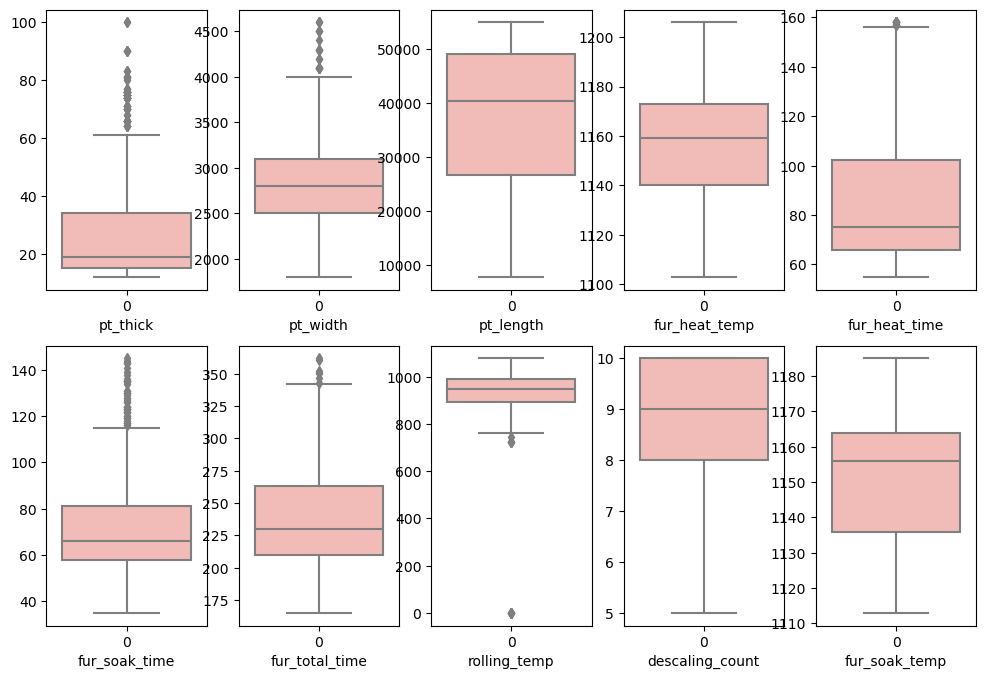

In [ ]:
f,ax = plt.subplots(2,5,figsize=(12,8))
sns.boxplot(data=df["pt_thick"], ax = ax[0,0]).set(xlabel="pt_thick")
sns.boxplot(data=df["pt_width"], ax = ax[0,1]).set(xlabel="pt_width")   # 연식은 오래 될 수도 있다.      # 위아래로 골고루 있는 듯 하다.
sns.boxplot(data=df["pt_length"], ax = ax[0,2]).set(xlabel="pt_length")
sns.boxplot(data=df["fur_heat_temp"], ax = ax[0,3]).set(xlabel="fur_heat_temp")
sns.boxplot(data=df["fur_heat_time"], ax = ax[0,4]).set(xlabel="fur_heat_time")

sns.boxplot(data=df["fur_soak_time"], ax = ax[1,0]).set(xlabel="fur_soak_time")
sns.boxplot(data=df["fur_total_time"], ax = ax[1,1]).set(xlabel="fur_total_time")
sns.boxplot(data=df["rolling_temp"], ax = ax[1,2]).set(xlabel="rolling_temp")
sns.boxplot(data=df["descaling_count"], ax = ax[1,3]).set(xlabel="descaling_count")
sns.boxplot(data=df["fur_soak_temp"], ax = ax[1,4]).set(xlabel="fur_soak_temp")


In [ ]:
# pt_thick 열의 값이 81.17보다 큰 행들을 제거
df[df["pt_thick"] >= 81.17]
# 83 83 90 90 90 100 100
#느낌상 100만 지우면되지 않을까(859 860 )

In [ ]:
df = df.drop(index=860)
df = df.drop(index=859)

In [ ]:
# hsb 미적용 값은 모두 불량이다
df[df["hsb"] == "미적용"]

In [ ]:
df[df["pt_width"] >= 4314.2]

In [ ]:
# fur_soak_temp 열의 값이 81.17보다 큰 행들을 제거
# 위의 이상치는 없음
df[df["fur_heat_time"] >= 164.8]

In [ ]:
# 아래에도 이상치는 없음
# 큰 차이 없긴함  141 145 144 143(3)
df[df["fur_soak_time"] >= 133.5]

In [ ]:
# 361 362
df[df["fur_total_time"] >= 352.8]

In [ ]:
# 있는 놈들 0임 0
# 0이 있어서 평균 편차가 이상해짐
# 723 4개 745 1개
df[df["rolling_temp"] <= 748.6]

In [ ]:
df.isnull().sum()

In [ ]:
#의미없는 plate_no 제거
df = df.drop(columns=['plate_no'], errors='ignore')

In [ ]:
# 제거확인
df

#### 변수 변형 및 파생

In [ ]:
df["fur_no"]= df["fur_no"].str.replace("호기","")
df["fur_input_row"] = df["fur_input_row"].str.replace("열","")
df["work_group"] = df["work_group"].str.replace("조","")
df.head(3)

In [ ]:
# rolling date 변형
df[['date', 'time']] = df['rolling_date'].str.split(':', 1, expand=True)
df = df.drop(columns=['rolling_date'], errors='ignore')
df['day'] = df['date'].str.split('JAN2023').str[0]
df['hour'] = df['time'].str.split(':').str[0]
df = df.drop(columns=['date','time'], errors='ignore')

df

In [ ]:
#정보확인
df.info()

In [ ]:
# 변수 변형: scale 원핫인코딩

df_raw= pd.get_dummies(df, columns=['scale'])
df_raw = df_raw.drop ('scale_양품', axis = 1)
df_raw['scale'] = df_raw['scale_불량']
df_raw

In [ ]:
#df 처리
# fur_combined
#fur_no,  fur_input_row --> 범주형 변수로 결합

df["fur_no"]= df["fur_no"].str.replace("호기","")
df["fur_input_row"] = df["fur_input_row"].str.replace("열","")
df["work_group"] = df["work_group"].str.replace("조","")
df.head(3)

df['fur_combined'] = df['fur_no'].astype(str) + '_' + df['fur_input_row'].astype(str)

# 결합된 열을 범주형 변수로 변환
df['fur_combined'] = df['fur_combined'].astype('category')

# df.drop(['fur_no', 'fur_input_row'], axis = 1, inplace = True)
# df.head()

#------------------------------
# df_raw 처리
# fur_combined
#fur_no,  fur_input_row --> 범주형 변수로 결합

df_raw["fur_no"]= df_raw["fur_no"].str.replace("호기","")
df_raw["fur_input_row"] = df_raw["fur_input_row"].str.replace("열","")
df_raw["work_group"] = df_raw["work_group"].str.replace("조","")
df_raw.head(3)

df_raw['fur_combined'] = df_raw['fur_no'].astype(str) + '_' + df_raw['fur_input_row'].astype(str)

# 결합된 열을 범주형 변수로 변환
df_raw['fur_combined'] = df_raw['fur_combined'].astype('category')

df_raw.drop(['fur_no', 'fur_input_row'], axis = 1, inplace = True)
df_raw.head()

#### 데이터 분리

In [ ]:
# 설명변수, 목표변수 데이터 구분
# x,y
df_raw_x = df.drop("scale", axis = 1, inplace = False)
df_raw_y = df["scale"]

In [ ]:
df_raw_x

In [ ]:
df_raw_y

## 변수 별 *검정*

#### 제품규격

In [ ]:
cross_tab = pd.crosstab(df["scale"], df["spec_long"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)
# 삭제예정

chi-squared statistic: 237.73230544888608
p-value: 1.6124938782265506e-21
degrees of freedom: 65
expected frequencies:
 [[ 0.31  1.86  0.93  0.31 15.81  9.61  2.79  0.62  9.92  0.62  5.89 10.54
   1.24  0.93  0.31 10.54  2.17 12.09  0.62 11.16  5.27  7.44  1.24  3.41
   2.79  1.86  4.96  0.62  1.86 10.23  1.55 26.04  7.44 14.26  3.41  0.31
   0.62  0.31  1.24  1.86  1.55  2.17  1.55 25.11 16.12  0.31  0.31  4.03
   0.31  0.62  3.1   5.89  0.31  0.93 14.88 10.23  0.93  0.62  0.93  1.24
   1.55  0.62  1.55 12.4   6.51  1.24]
 [ 0.69  4.14  2.07  0.69 35.19 21.39  6.21  1.38 22.08  1.38 13.11 23.46
   2.76  2.07  0.69 23.46  4.83 26.91  1.38 24.84 11.73 16.56  2.76  7.59
   6.21  4.14 11.04  1.38  4.14 22.77  3.45 57.96 16.56 31.74  7.59  0.69
   1.38  0.69  2.76  4.14  3.45  4.83  3.45 55.89 35.88  0.69  0.69  8.97
   0.69  1.38  6.9  13.11  0.69  2.07 33.12 22.77  2.07  1.38  2.07  2.76
   3.45  1.38  3.45 27.6  14.49  2.76]]


- 카이제곱 통계량 233
- P-value : 3.487523403968362e-21
- 자유도 : 64
- 귀무가설: 제품 규격과 뷸량율은 관련이 없다
- 대립가설 : 제품 규격과 뷸량율은 관련이 있다
- 검정결과 P-value는 0에 수렴하므로 귀무가설을 기각할 수 있고 따라서 제품 규격과 불량율은 관련이 있다.

### 제품 규격 기준국

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

chi-squared statistic: 68.38385440143149
p-value: 8.766804557877507e-13
degrees of freedom: 6
expected frequencies:
 [[ 11.16  26.97  49.29  79.36  57.97  44.33  40.92]
 [ 24.84  60.03 109.71 176.64 129.03  98.67  91.08]]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

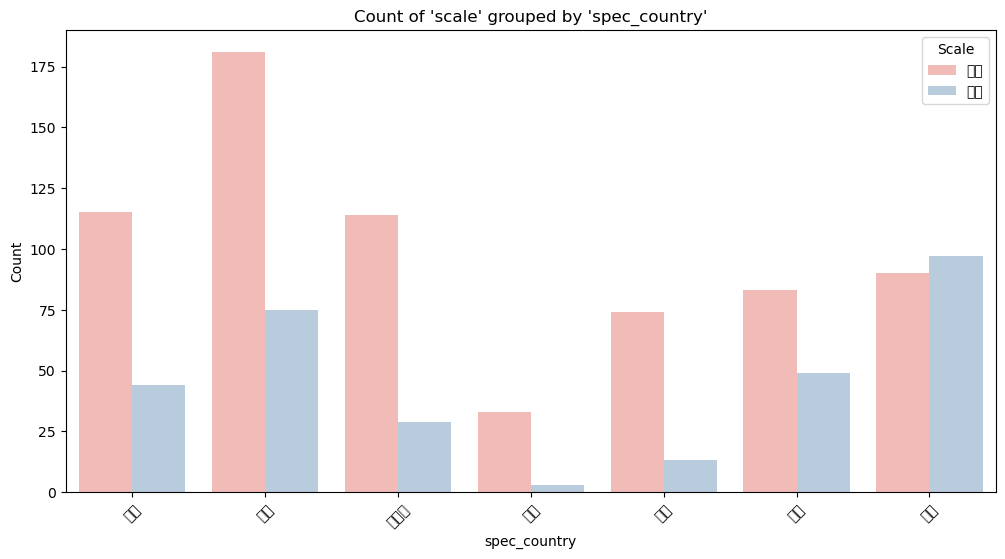

In [ ]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df["scale"], df["spec_country"])

# Perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# Print the results
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

# Plotting countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="spec_country", hue="scale")
plt.title("Count of 'scale' grouped by 'spec_country'")
plt.xlabel("spec_country")
plt.ylabel("Count")
plt.legend(title="Scale")
plt.xticks(rotation=45)
plt.show()

- 카이제곱 통계량 6.76
- P-value : 2.3668925488662356e-12
- 자유도 : 6
- 귀무가설: 제품 규격 기준국과 뷸량율은 관련이 없다
- 대립가설 : 제품 규격 기준국과 뷸량율은 관련이 있다
- 검정결과 P-value는 0에 수렴하므로 귀무가설을 기각할 수 있고 따라서 제품 규격 기준국과 불량율은 관련이 있다.

### 강종

In [ ]:
# 강종
cross_tab = pd.crosstab(df["scale"], df["steel_kind"])

# Perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# Print the results
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

# Plotting countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="steel_kind", hue="scale")
plt.title("Count of 'scale' grouped by 'steel_kind'")
plt.xlabel("steel_kind")
plt.ylabel("Count")
plt.legend(title="scale")
plt.xticks(rotation=45)
plt.show()


- 카이제곱 통계량 77
- P-value : 1.7064944645927214e-18
- 자유도 : 1
- 귀무가설 : 강종에 따라 뷸량율은 관련이 없다
- 대립가설 : 강종에 기준국과 뷸량율은 관련이 있다
- 검정결과 P-value는 0에 수렴하므로 귀무가설을 기각할 수 있고 따라서 강종과 불량율은 관련이 있다.

### 시간

In [ ]:
cross_tab = pd.crosstab(df["scale"], df["hour"])

# Perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# Print the results
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

# Plotting countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="hour", hue="scale")
plt.title("Count of 'scale' grouped by 'day'")
plt.xlabel("hour")
plt.ylabel("Count")
plt.legend(title="Scale")
plt.xticks(rotation=45)
plt.show()

- 카이제곱 통계량 41.8
- P-value : 0.009414
- 자유도 : 23
- 귀무가설 : 시간과 뷸량율은 관계가 없다
- 대립가설 : 시간과 기준국과 뷸량율은 관계가 있다
- 검정결과 P-value는 0에 수렴하므로 귀무가설을 기각할 수 있고 따라서 시간과 불량율은 관련이 있다.

### 요일

In [ ]:
# 요일에 대한 cross tab
cross_tab = pd.crosstab(df["scale"], df["day"])

# Perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# Print the results
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

# Plotting countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="day", hue="scale")
plt.title("Count of 'scale' grouped by 'day'")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Scale")
plt.xticks(rotation=45)
plt.show()

- 카이제곱 통계량 117.16
- P-value :2.974627637034171e-22
- 자유도 : 7
- 귀무가설 : 날짜와 뷸량율은 관계가 없다
- 대립가설 : 날짜와 기준국과 뷸량율은 관계가 있다
- 검정결과 P-value는 0에 수렴하므로 귀무가설을 기각할 수 있고 따라서 날짜와 불량율은 관련이 있다.

# 후판 지시 두께(mm)

In [ ]:
f, ax = plt.subplots(figsize = (20,15))
sns.countplot(x="pt_thick", data=df, hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 8, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.legend(loc="upper right")
plt.show()

In [ ]:
# 독립 변수와 종속 변수를 지정합니다.
x = df["pt_thick"] #연속형
y = df["scale"] #범주형

# scale 변수를 숫자로 변환 (양품=1, 불량품=0)
y = y.apply(lambda x: 1 if x == '양품' else 0)

# 독립 변수에 상수 추가
x = sm.add_constant(x)

# 데이터 타입 확인 및 변환
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, x).fit()

# 모델의 성능을 확인합니다.
print(model.summary())

- 귀무가설 : pt_thick 변수는 scale 변수에 유의미한 영향을 미치지 않는다.
- 대립가설 : pt_thick 변수는 scale 변수에 유의미한 영향을 미친다.
- pt_thick의 p 값이 0.05보다 작기 때문에, 귀무가설을 기각할 수 있습니다.
- 따라서 pt_thick 변수는 scale 변수에 유의미한 영향을 미친다고 할 수 있습니다.

# pt_width : 후판 지시폭 (mm)

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
sns.countplot(x= "pt_width", data=df, hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 8, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

- 후판 지시폭이 증가할수록 불량률은 감소하는 경향을 보인다

In [ ]:
# 독립 변수와 종속 변수를 지정합니다.
x = df["pt_width"] #연속
y = df["scale"] #범주

# scale 변수를 숫자로 변환 (양품=1, 불량품=0)
y = y.apply(lambda x: 1 if x == '양품' else 0)

# 독립 변수에 상수 추가
x = sm.add_constant(x)

# 데이터 타입 확인 및 변환
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, x).fit()

# 모델의 성능을 확인합니다.
print(model.summary())

- 귀무가설 : pt_width 변수는 scale 변수에 유의미한 영향을 미치지 않는다.
- 대립가설 : pt_width 변수는 scale 변수에 유의미한 영향을 미친다.
- pt_width의 p 값이 0.05보다 작기 때문에, 귀무가설을 기각할 수 있습니다.
- 따라서 pt_width 변수는 scale 변수에 유의미한 영향을 미친다고 할 수 있습니다.


# pt_length : 후판 지시길이 (mm)

In [ ]:
sns.violinplot(x="scale", y="pt_length", data=df)


- 후판의 길이가 40000mm 근처 일 때 불량품이 제일 많았다

In [ ]:
# 독립 변수와 종속 변수를 지정합니다.
x = df["pt_length"] #연속
y = df["scale"] #범주

# scale 변수를 숫자로 변환 (양품=1, 불량품=0)
y = y.apply(lambda x: 1 if x == '양품' else 0)

# 독립 변수에 상수 추가
x = sm.add_constant(x)

# 데이터 타입 확인 및 변환
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, x).fit()

# 모델의 성능을 확인합니다.
print(model.summary())

- 귀무가설 : pt_length 변수는 scale 변수에 유의미한 영향을 미치지 않는다.
- 대립가설 : pt_length 변수는 scale 변수에 유의미한 영향을 미친다.
- pt_length의 p 값이 0.05보다 크기 때문에, 귀무가설을 기각할 수 없습니다.
- 따라서 pt_length 변수는 scale 변수에 유의미한 영향을 미친다고 할 수 없습니다.

- hsb : Hot Scale Breaker / 강판의 표면 스케일을 제거하기 위한 장비

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
sns.countplot(x="hsb", data=df , hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 10, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
## 범주 범주

cross_tab = pd.crosstab(df["scale"], df["hsb"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

- 귀무가설 : HSB여부에 따라 Scale에 영향을 미치지 않는다.
- 대립가설 : HSB여부에 따라 Scale에 영향을 미친다.
- 카이제곱 검정의 p 값이 0.05보다 작기 때문에, 귀무가설을 기각할 수 있습니다.
- 따라서 HSB여부는 Scale에 유의미한 영향을 미친다고 할 수 있습니다.

#### fur no

In [ ]:
# fur_no(용광로 번호) 고유값 개수 출력
df["fur_no"].value_counts()

In [ ]:
# 가열로 호기(1~3호기)설명변수와 scale 목표변수 간의 관계 시각화
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='fur_no', hue='scale')
plt.show()

불량품은 가열로 호기(1~3호기)와 관계없이 비슷한 빈도로 나타난다.

In [ ]:
###### from scipy.stats import chi2_contingency <- 이거 위에 임포트 해주셔야해용

# 가열로 호기별 scale 발생 빈도 카이제곱 검정 실행
cross_tab = pd.crosstab(df["scale"], df["fur_no"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

- 카이제곱 통계량: 2.67
- p-value: 0.263
- 자유도: 2

- 귀무가설 : 가열로 호기와 scale 발생 빈도 간에는 상관 관계가 없다.
- 대립가설 : 가열로 호기와 scale 발생 빈도 간에는 상관 관계가 있다.

결론 : p-값이 0.263이 유의수준 a = 0.05보다 크므로 귀무가설을 기각할 수 없다.

#### fur input row

In [ ]:
# fur_input_row(가열로 장입열) 고유값 개수 출력
df["fur_input_row"].value_counts()

In [ ]:
# 가열로 장입열(1,2열) 설명변수와 scale 목표변수 간의 관계 시각화
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='fur_input_row', hue='scale')
plt.show()

불량품은 가열로 장입열(1,2열)과 관계없이 비슷한 빈도로 나타난다.

In [ ]:
# 가열로 장입열별 scale 발생 빈도 카이제곱 검정 실행
cross_tab = pd.crosstab(df["scale"], df["fur_input_row"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

- 카이제곱 통계량: 0.928
- p-value: 0.335
- 자유도: 1
- 귀무가설 : 가열로 장입열과 scale 발생 빈도 간에는 상관 관계가 없다.
- 대립가설 : 가열로 장입열과 scale 발생 빈도 간에는 상관 관계가 있다.

결론 : p-값이 0.335는 유의수준 a = 0.05보다 크므로 귀무가설을 기각할 수 없다.

#### fur total time

In [ ]:
#fur_total_time(가열로 총 재로시간(분))  고유값 개수 출력
df["fur_total_time"].value_counts()

In [ ]:
#fur_total_time(가열로 총 재로시간(분)) 설명변수와 scale 목표변수 간의 관계 시각화
plt.figure(figsize=(10, 8))
sns.histplot(df, x='fur_total_time', hue='scale', multiple='stack', kde=True)

양품과 불량품이 모두 정규분포와 유사한 형태를 보인다. 그리고 양품이 상대적으로 더 높은 빈도로 보이는 구간이 많다. 그래프 상으로는 fur_total_time과 scale 간에 약간의 관계가 있는 것으로 보인다.

In [ ]:
# 로지스틱 회귀분석


# 독립 변수와 종속 변수를 지정합니다.
x = df["fur_total_time"] #연속형
y = df["scale"] #범주형

# scale 변수를 숫자로 변환 (양품=1, 불량품=0)
y = y.apply(lambda x: 1 if x == '양품' else 0)

# 독립 변수에 상수 추가
x = sm.add_constant(x)

# 데이터 타입 확인 및 변환
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, x).fit()

# 모델의 성능을 확인합니다.
print(model.summary())

fur_total_time(가열로 총 재로시간)은 scale (양품/불량)에 유의미한 영향을 미치며, fur_total_time이 증가할수록 양품이 될 확률이 증가한다. 그러나 모델의 Pseudo R-squared 값이 매우 낮아, fur_total_time만으로 scale의 변동을 충분히 설명하지 못하고 있다. 따라서, scale에 영향을 미치는 추가적인 변수들을 고려하여 모델을 개선할 필요가 있습니다. 예를 들어, 다른 제조 공정 변수들을 포함하거나, 데이터의 불균형 문제를 해결할 수 있는 방법을 모색해야 합니다.

#### rolling method

In [ ]:
# rolling_method(압연방법) 고유값 개수 출력
df["rolling_method"].value_counts()

In [ ]:
# rolling_method(압연방법) 설명변수와 scale 목표변수 간의 관계 시각화
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='rolling_method', hue='scale')
plt.show()

TMC(온도제어) 방법이 양품 비율이 매우 높고, 불량 비율이 매우 낮다. CR(재어압연) 방법은 불량 비율이 비교적 높다.

In [ ]:
# rolling_method(압연방법)별 scale 발생 빈도 카이제곱 검정 실행
cross_tab = pd.crosstab(df["scale"], df["rolling_method"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

- 카이제곱 통계량: 44.90581731932742
- p-value: 2.0674276747735735e-11
- 자유도: 1

- 귀무가설 : 압연 방법과 scale 발생 사이에 연관성이 없다.
- 대립가설 : 압연 방법과 scale 발생 사이에 연관성이 있다.

- 결론 : p-값이 유의수준 a = 0.05보다 매우 작으므로 귀무가설을 기각할 수 있다.
- 따라서 압연 방법과 scale 발생 사이에 연관성이 있다고 할 수 있다.

#### fur heat temp

In [ ]:
sns.histplot(df[df["scale"]=="양품"]["fur_heat_temp"],bins=50, color="blue")
sns.histplot(df[df["scale"]=="불량"]["fur_heat_temp"],bins=50, color="red")

In [ ]:
## 로지스틱 회귀분석

import statsmodels.api as sm

# 독립 변수와 종속 변수를 지정합니다.
x = df["fur_heat_temp"]
y = df["scale"]
y = y.apply(lambda x: 1 if x == '양품' else 0)
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, sm.add_constant(x)).fit()

# 모델의 성능을 확인합니다.
print(model.summary())



귀무가설 : fur_heat_temp 값이 scale에 영향을 주지 않는다.
대립가설 : fur_heat_temp 값이 scale에 영향을 준다.
P-value가 0이므로 귀무가설을 기각할 수 있다.
그러므로 fur_heat_temp 값이 scale에 영향을 준다고 할 수 있다.

#### fur heat time

In [ ]:
sns.histplot(df[df["scale"]=="양품"]["fur_heat_time"],bins=50, color="blue")
sns.histplot(df[df["scale"]=="불량"]["fur_heat_time"],bins=50, color="red")

In [ ]:
## 로지스틱 회귀분석

import statsmodels.api as sm

# 독립 변수와 종속 변수를 지정합니다.
X = df["fur_heat_time"]
y = df["scale"]
y = y.apply(lambda x: 1 if x == '양품' else 0)
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, sm.add_constant(X)).fit()

# 모델의 성능을 확인합니다.
print(model.summary())


귀무가설 : fur_heat_time 값이 scale에 영향을 주지 않는다.
대립가설 : fur_heat_time 값이 scale에 영향을 준다.
P-value가 0.264이므로 귀무가설을 기각할 수 없다.
그러므로 fur_heat_time 없이 scale에 영향을 주지 않는다.

#### fur soak temp

In [ ]:
sns.histplot(df[df["scale"]==0]["fur_soak_temp"],bins=50, color="blue")
sns.histplot(df[df["scale"]==1]["fur_soak_temp"],bins=50, color="red")

In [ ]:
## 로지스틱 회귀분석

import statsmodels.api as sm

# 독립 변수와 종속 변수를 지정합니다.
X = df["fur_soak_temp"]
y = df["scale"]
y = y.apply(lambda x: 1 if x == '양품' else 0)
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, sm.add_constant(X)).fit()

# 모델의 성능을 확인합니다.
print(model.summary())


#### fur soak time

In [ ]:
sns.histplot(df[df["scale"]=="양품"]["fur_soak_time"],bins=50, color="blue")
sns.histplot(df[df["scale"]=="불량"]["fur_soak_time"],bins=50, color="red")

In [ ]:
## 로지스틱 회귀분석

import statsmodels.api as sm

# 독립 변수와 종속 변수를 지정합니다.
X = df["fur_soak_time"]
y = df["scale"]
y = y.apply(lambda x: 1 if x == '양품' else 0)
x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, sm.add_constant(X)).fit()

# 모델의 성능을 확인합니다.
print(model.summary())


#### rolling_temp : 압연온도

In [ ]:
a = pd.DataFrame(df["rolling_temp"].value_counts())
a.head()

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
sns.violinplot(y="rolling_temp", data=df, hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 8, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
## 로지스틱 회귀분석
# 독립 변수와 종속 변수를 지정합니다.
x = df["rolling_temp"]
y = df["scale"]
y = y.apply(lambda x: 1 if x == '양품' else 0)
# 로지스틱 회귀 모델을 학습합니다.
model = sm.Logit(y, sm.add_constant(x)).fit()

# 모델의 성능을 확인합니다.
print(model.summary())

#### descaling_count: 압연 descaling 횟수

In [ ]:
a = pd.DataFrame(df["descaling_count"].value_counts())
a.head()

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
sns.countplot(x="descaling_count", data=df, hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 8, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(df["scale"], df["descaling_count"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)


#### fur_combined: 가열로 호기 + 장입열

In [ ]:
a = pd.DataFrame(df["fur_combined"].value_counts())
a.head()

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
sns.countplot(x ="fur_combined", data=df, hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 8, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
## 범주 범주

cross_tab = pd.crosstab(df_raw["scale"], df_raw["fur_combined"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

#### 결과요약
- 카이제곱 통계량(관측데이터와 기대 데이터의 차이) : 7.156
- p-value(유의 확률) : 0.2092
- 자유도(분포 모양): 5
- 기대빈도

#### 결론
- 귀무가설(H0): 'scale' 변수와 'fur_combined' 변수 독립이다
- 대립가설(H1): 'scale' 변수와 'fur_combined' 변수는 독립적이지 않다.
#### p-value(0.2198)가 0.05보다 크기 때문에 귀무가설을 기각할 수 없다.

- work_group별 scale의 차이

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
sns.countplot(x ="work_group", data=df, hue="scale")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 8, )

fig = plt.gcf()
fig.set_size_inches(13,8) # 그래프 사이즈 조절
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
## 범주 범주

cross_tab = pd.crosstab(df_raw["scale"], df_raw["work_group"])

# 카이제곱 검정 실행
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("chi-squared statistic:", chi2)
print("p-value:", pval)
print("degrees of freedom:", dof)
print("expected frequencies:\n", expected)

#### 결과요약
- p-value(유의 확률) : 0.00286
#### 결론
- 귀무가설(H0): 'scale' 변수와 'work_group' 변수 독립이다
- 대립가설(H1): 'scale' 변수와 'work_group' 변수는 독립적이지 않다.
#### p-value(0.2198)가 0.05보다 크기 때문에 귀무가설을 기각할 수 없다.
- 따라서 'scale' 변수와 'work_group'변수는 독립적이지 않다

In [ ]:
del df["pt_length"]
del df["fur_no"]
del df["fur_input_row"]
del df["fur_heat_time"]
del df["fur_combined"]
del df["spec_long"]
#"spec_long"이 유의한 것으로 검정되었지만 "spec_long"의 앞 두글자가 "spec_country"와
# 밀접하게 연관되어 있기 때문에 독립변수간의 상관도를 고려하여 삭제하였음

In [ ]:
df_y = df[["scale"]]
df_x = df.drop(["scale"],axis=1)
print("Length of df_x:", len(df_x))
print("Length of df_y:", len(df_y))

In [ ]:
common_index = df_x.index.intersection(df_y.index)
df_x = df_x.loc[common_index].reset_index(drop=True)
df_y = df_y.loc[common_index].reset_index(drop=True)


In [ ]:
df_y

In [ ]:
df_x

In [ ]:
x_cat = df[["spec_country", "steel_kind","hsb","rolling_method"]]
x_num = df[["pt_thick", "pt_width", "fur_heat_temp", "fur_soak_temp", "fur_soak_time", "fur_total_time","rolling_temp", "descaling_count","work_group","day","hour"]]


In [ ]:
x_cat = pd.get_dummies(x_cat).reset_index(drop=True)

In [ ]:
scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x_num)
x_num_scaled_df = pd.DataFrame(x_num_scaled, columns=x_num.columns)

In [ ]:
df_x = pd.DataFrame(pd.concat([x_num_scaled_df,x_cat],axis=1))


In [ ]:
x_num_scaled_df

In [ ]:
print(len(df_x))
print(len(df_y))

In [ ]:
train_x , test_x, train_y, test_y = train_test_split(df_x, df_y ,random_state=1234 , test_size=0.3)

In [ ]:
df_x.isnull().sum()

In [ ]:
train_x.shape

In [ ]:
test_x.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier #의사결정나무

#기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(train_x, train_y)

#train 모델 정확도
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(train_x, train_y)))

#test 모델 정확도
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(test_x, test_y)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트

rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(train_x,train_y)
print("Score on training set: {:.3f}".format(rf_uncustomized.score(train_x,train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(test_x,test_y)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #그래디언트 부스팅

tree_uncustom = GradientBoostingClassifier(random_state=1234)
tree_uncustom.fit(train_x, train_y)

print("train data의 score: {:.3f}".format(tree_uncustom.score(train_x, train_y)))
print("test data의 score: {:.3f}".format(tree_uncustom.score(test_x, test_y)))

In [ ]:
train_y['scale'] = train_y['scale'].apply(lambda x: 1 if x == '양품' else 0)
test_y['scale'] = test_y['scale'].apply(lambda x: 1 if x == '양품' else 0)

In [ ]:
from xgboost import XGBClassifier #XGBoost


xgboost_uncust = XGBClassifier(random_state=1234)
xgboost_uncust.fit(train_x, train_y)

print("train data의 score: {:.3f}".format(xgboost_uncust.score(train_x, train_y)))
print("test data의 score: {:.3f}".format(xgboost_uncust.score(test_x, test_y)))

In [ ]:
from sklearn.svm import SVC

svm_uncustomized = SVC(random_state=1234)  # SVM 분류기 학습
svm_uncustomized.fit(train_x, train_y)
# train 모델 정확도
print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(train_x, train_y)))
# test 모델 정확도
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(test_x, test_y)))

In [ ]:
from sklearn.neural_network import MLPClassifier #인공신경망

nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(train_x, train_y)

print('Score on training set: {:.3f}'.format(nn_uncustomized.score(train_x, train_y)))
print('Score on test set: {:.3f}'.format(nn_uncustomized.score(test_x, test_y)))

### 그래디언트부스팅

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(train_x,train_y)
    train_accuracy.append(gb.score(train_x,train_y))
    test_accuracy.append(gb.score(test_x, test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [ ]:
# LearningRate별 정확도
df_accuracy_lr.round(3)

In [ ]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()
# 0.2

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.2, random_state=1234)
    gb.fit(train_x, train_y)
    train_accuracy.append(gb.score(train_x, train_y))
    test_accuracy.append(gb.score(test_x, test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [ ]:
para_n_tree

In [ ]:
# n_estimators별 정확도
df_accuracy_n.round(3)

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()
#80

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=80, learning_rate=0.2, random_state=1234)
    gb.fit(train_x, train_y)
    train_accuracy.append(gb.score(train_x, train_y))
    test_accuracy.append(gb.score(test_x, test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [ ]:
# max_depth별 정확도
df_accuracy_depth.round(3)

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()
#3

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 1 for n_split in range(2,60)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=3, n_estimators=80, learning_rate=0.2, random_state=1234)
    gb.fit(train_x, train_y)
    train_accuracy.append(gb.score(train_x, train_y))
    test_accuracy.append(gb.score(test_x, test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [ ]:
# min_samples_leaf별 정확도
df_accuracy_split.round(3)

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=3, n_estimators=80, learning_rate=0.2, random_state=1234)
    gb.fit(train_x, train_y)
    train_accuracy.append(gb.score(train_x, train_y))
    test_accuracy.append(gb.score(test_x, test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [ ]:
# min_samples_leaf별 정확도
df_accuracy_leaf.round(3)

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()
#10

In [ ]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=3, n_estimators=80, learning_rate=0.2,
                                      random_state=1234)
gb_final.fit(train_x, train_y)
# 예측
y_pred = gb_final.predict(test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(train_x, train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(test_x, test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(test_y, y_pred, digits=3))

In [ ]:
estimator = GradientBoostingClassifier(n_estimators=80, random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"learning_rate": para_lr,
              "max_depth": para_depth,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1) #accuracy 말고 recall 활용 가능
grid_gb.fit(train_x, train_y)
print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))